In [1]:
# Cell 1: Install Correct Library Versions
!pip install "transformers==4.30.2" "tensorflow==2.15.0"
print("✅ Libraries installed.")
print("🔴 IMPORTANT: You MUST restart your runtime now!")
print("Go to 'Runtime' -> 'Restart runtime' in the menu above.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 64.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.2
    Uninstalling tokenizers-0.21.2:
      Successfully uninstalled tokenizers-0.21.2
  Att

In [1]:
!pip install gdown

In [2]:
!gdown --id 1yBRaXCCO8oFAOUnnMtDUxs8p3-qzdjcz --folder

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1iQnekVGWFBCUXuvW4RffkqH_2-RuXG5n stage1_bert_epoch_02_final.keras
Processing file 1VBg56WnuJvUy5We5lEkwk5WuyvOvtNTl stage1_shap_arrays.npz
Processing file 1QgL040GvoZgn6r9v0d09IcPuiIGBQ4Tl stage1_shap_explainer.joblib
Processing file 1LMM2u4aRSeMEvY99vCLRJGWqpegsesfm stage1_shap_explanation.joblib
Processing file 1CN5Gys7VNMPpvt2SETBD-ZUusGp3IJDp stage1_shap_explanation.pkl
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1iQnekVGWFBCUXuvW4RffkqH_2-RuXG5n
From (redirected): https://drive.google.com/uc?id=1iQnekVGWFBCUXuvW4RffkqH_2-RuXG5n&confirm=t&uuid=ec61ea08-1c34-4768-af8b-e4beece2e8b0
To: /kaggle/working/

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings

# --- ML & Data ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# --- Transformers (BERT) ---
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

# --- Setup ---
warnings.filterwarnings('ignore')
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
stop_words = set(stopwords.words('english'))

print("✅ All libraries imported.")
print(f"TensorFlow Version: {tf.__version__}")

2025-11-02 04:21:51.651535: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-02 04:21:51.651614: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-02 04:21:51.653493: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✅ All libraries imported.
TensorFlow Version: 2.15.0


In [5]:
# Cell 2: Load All Components and Run Plot (with Weight Loading Fix)
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import joblib
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

print(f"TensorFlow Version: {tf.__version__}") # Should be 2.15.0
print(f"SHAP Version: {shap.__version__}")

# --- 1. DEFINE CONSTANTS ---
MODEL_NAME = 'distilbert-base-uncased' # Must match your training
MAX_LEN = 128
BASE_PATH = '/kaggle/working/FYP/' # From your error log
CORRECT_MODEL_PATH = f'{BASE_PATH}stage1_bert_epoch_02_final.keras'
SHAP_OBJECT_PATH = f'{BASE_PATH}stage1_shap_explanation.joblib'
DATASET_PATH = "/kaggle/input/fakejobposts/fake_job_postings.csv" # UPDATE THIS PATH

# --- 2. LOAD TOKENIZER ---
print(f"Loading tokenizer for '{MODEL_NAME}'...")
try:
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
    print("✅ Tokenizer loaded.")
except Exception as e:
    print(f"❌ Error loading tokenizer: {e}")
    raise

# --- 3. LOAD MODEL (THE NEW WAY) ---
print(f"Loading Stage 1 BERT model weights from '{CORRECT_MODEL_PATH}'...")
try:
    # 3a. Create a fresh, empty model from the same blueprint
    stage1_model = TFAutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
    print("   Created fresh model architecture.")
    
    # 3b. Load *only the weights* from your saved file into this new model
    stage1_model.load_weights(CORRECT_MODEL_PATH)
    print("✅ Stage 1 Model weights loaded successfully.")
    
except Exception as e:
    print(f"❌ Error loading Stage 1 model weights: {e}")
    print("   This can happen if the model file is corrupt or the MODEL_NAME is wrong.")
    raise

# --- 4. RE-DEFINE THE PREDICTION WRAPPER ---
def predict_proba_wrapper(text_list):
    if isinstance(text_list, np.ndarray): text_list = text_list.tolist()
    global tokenizer, stage1_model, MAX_LEN
    try:
        inputs = tokenizer(text_list, return_tensors='tf', truncation=True, padding=True, max_length=MAX_LEN)
        outputs = stage1_model(inputs)
        logits = outputs.logits
        probs = tf.nn.softmax(logits, axis=-1).numpy()
        return probs
    except Exception as e:
        print(f"An error occurred during prediction in wrapper: {e}")
        return np.zeros((len(text_list), 2))
print("✅ Prediction wrapper function re-defined.")

# --- 5. RE-CREATE THE VALIDATION TEXT/LABELS ---
print("Re-creating validation data split to get text and labels...")
try:
    df = pd.read_csv(DATASET_PATH)
    text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
    for col in text_columns: df[col] = df[col].fillna('')
    df['text_combined'] = df[text_columns].apply(lambda x: ' '.join(x), axis=1)
    
    target = 'fraudulent'
    y_data = df[target].values
    X_text_data = df['text_combined'].tolist()
    
    X_train_text, X_val_text, y_train, y_val = train_test_split(
        X_text_data, y_data, test_size=0.2, random_state=42, stratify=y_data
    )
    
    SAMPLE_EXPLAIN_SIZE = 50 # MUST match the size used when you calculated SHAP
    if len(X_val_text) < SAMPLE_EXPLAIN_SIZE: SAMPLE_EXPLAIN_SIZE = len(X_val_text)
    X_explain_text = X_val_text[:SAMPLE_EXPLAIN_SIZE]
    y_explain_labels = y_val[:SAMPLE_EXPLAIN_SIZE]
    
    print(f"✅ Re-created 'X_explain_text' and 'y_explain_labels' for {SAMPLE_EXPLAIN_SIZE} samples.")
except FileNotFoundError:
    print(f"❌ ERROR: '{DATASET_PATH}' not found. Cannot re-create validation set. Please add it to your notebook.")
except Exception as e:
    print(f"❌ Error re-creating validation data: {e}")

# --- 6. LOAD THE SAVED SHAP OBJECT ---
print(f"Loading SHAP Explanation object from '{SHAP_OBJECT_PATH}'...")
try:
    shap_values_stage1 = joblib.load(SHAP_OBJECT_PATH)
    print("✅ SHAP Explanation object loaded.")
except FileNotFoundError:
    print(f"❌ ERROR: File not found at '{SHAP_OBJECT_PATH}'.")
except Exception as e:
    print(f"❌ Error loading SHAP object: {e}")

# --- 7. RUN YOUR CODE SNIPPET ---
print("\n--- Running Your Explanation Snippet ---")

sample_idx = 15 # The sample you want to explain

if 'shap_values_stage1' not in locals() or 'X_explain_text' not in locals():
     print("❌ Cannot run snippet: SHAP values or Text data was not loaded.")
elif sample_idx >= len(X_explain_text) or (hasattr(shap_values_stage1, 'shape') and sample_idx >= shap_values_stage1.shape[0]):
    print(f"❌ ERROR: sample_idx {sample_idx} is out of range.")
    print(f"   'X_explain_text' has {len(X_explain_text)} samples.")
    if hasattr(shap_values_stage1, 'shape'):
        print(f"   'shap_values_stage1' has {shap_values_stage1.shape[0]} samples.")
else:
    # Your exact code snippet:
    try:
        print(f"\n--- Explaining Sample {sample_idx} ---")
        print(f"Text: {X_explain_text[sample_idx][:200]}...")
        print(f"Actual Label: {'Fake' if y_explain_labels[sample_idx] == 1 else 'Real'}")
    
        predicted_probs = predict_proba_wrapper([X_explain_text[sample_idx]])
        print(f"Predicted Base Risk (Fake): {predicted_probs[0, 1]:.6%}")
    
        # Plot explanation for the 'Fake' class (index 1) directly
        print("Generating SHAP text plot...")
        shap.plots.text(shap_values_stage1[sample_idx, :, 1])
    
    except IndexError:
         print(f"❌ IndexError during plotting. The structure of shap_values_stage1 might be unexpected.")
         print("    Try plotting without the class index: shap.plots.text(shap_values_stage1[sample_idx])")
    except AttributeError:
         print("❌ AttributeError: shap_values_stage1 object structure issue. SHAP calculation may have failed.")
    except Exception as e:
         print(f"❌ An error occurred during visualization: {e}")

TensorFlow Version: 2.15.0
SHAP Version: 0.44.1
Loading tokenizer for 'distilbert-base-uncased'...
✅ Tokenizer loaded.
Loading Stage 1 BERT model weights from '/kaggle/working/FYP/stage1_bert_epoch_02_final.keras'...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

   Created fresh model architecture.
✅ Stage 1 Model weights loaded successfully.
✅ Prediction wrapper function re-defined.
Re-creating validation data split to get text and labels...
✅ Re-created 'X_explain_text' and 'y_explain_labels' for 50 samples.
Loading SHAP Explanation object from '/kaggle/working/FYP/stage1_shap_explanation.joblib'...
✅ SHAP Explanation object loaded.

--- Running Your Explanation Snippet ---

--- Explaining Sample 15 ---
Text: Project Cost Control Staff Engineer - Cost Control Exp - TX We Provide Full Time Permanent Positions for many medium to large US companies. We are interested in finding/recruiting high quality candida...
Actual Label: Real
Predicted Base Risk (Fake): 0.092731%
Generating SHAP text plot...


In [6]:
# Cell X: Personalized Prediction Function

import numpy as np

print("\n--- Defining Personalized Prediction Function ---")

# --- 1. Define Personalization Weights (YOU CUSTOMIZE THESE) ---
# These are example weights. You will need to fine-tune these based on your
# understanding of how each user type should adjust the risk.
# Each weight should be applied to the 'fake_probability'.

# Structure: { 'user_profile_category': { 'weight_name': value } }
# 'adjustment_factor': How much to multiply the fake_probability by.
#   - >1.0 makes it seem MORE risky for that user type.
#   - <1.0 makes it seem LESS risky for that user type.
#   - 1.0 means no change.

# Example: If a job is 80% fake probability, and 'fresher' has factor 1.2,
# then new probability is min(80% * 1.2, 100%) = min(96%, 100%) = 96%.
# If 'experienced' has factor 0.8, then new probability is 80% * 0.8 = 64%.

PERSONALIZATION_WEIGHTS = {
    'fresher': {
        'adjustment_factor': 1.2, # Fresher users are more vulnerable, so slightly increase risk perception
        'description': "Fresher users often lack experience to spot subtle scams, so we slightly increase the reported risk."
    },
    'mid-career': {
        'adjustment_factor': 1.05, # Mid-career users are somewhat vulnerable
        'description': "Mid-career users have some experience, but we apply a small adjustment for common scams."
    },
    'experienced': {
        'adjustment_factor': 0.8, # Experienced users are less likely to fall for scams, so slightly decrease risk perception
        'description': "Experienced users are generally better at identifying fraudulent postings, so we slightly decrease the reported risk."
    },
    'default': { # For any user profile not explicitly listed
        'adjustment_factor': 1.0,
        'description': "No specific user profile provided, using default risk perception."
    }
}

# --- 2. Define the Personalization Function ---
def get_personalized_risk(job_text: str, user_profile: str = 'default') -> dict:
    """
    Calculates the personalized risk score for a job posting based on user profile.

    Args:
        job_text (str): The combined text of the job posting.
        user_profile (str): The user's career stage/experience level (e.g., 'fresher', 'experienced').

    Returns:
        dict: A dictionary containing:
            'base_risk_probability': The original probability of being fake from the model.
            'personalized_risk_probability': The adjusted probability based on user profile.
            'adjustment_description': Explanation of the personalization.
            'user_profile_used': The user profile category that was applied.
    """
    global predict_proba_wrapper # Ensure access to your DistilBERT prediction wrapper

    # Get base probabilities from your DistilBERT model
    # predict_proba_wrapper returns [prob_real, prob_fake]
    base_probs = predict_proba_wrapper([job_text])[0] # [0] because it's a single prediction
    base_fake_probability = base_probs[1] # Probability of being the 'Fake' class

    # Determine which personalization weights to use
    profile_settings = PERSONALIZATION_WEIGHTS.get(user_profile.lower(), PERSONALIZATION_WEIGHTS['default'])
    adjustment_factor = profile_settings['adjustment_factor']
    adjustment_description = profile_settings['description']
    user_profile_used = user_profile.lower() if user_profile.lower() in PERSONALIZATION_WEIGHTS else 'default'

    # Apply the adjustment factor
    personalized_fake_probability = base_fake_probability * adjustment_factor

    # Ensure the probability stays within [0, 1] range
    personalized_fake_probability = np.clip(personalized_fake_probability, 0.0, 1.0)

    return {
        'base_risk_probability': float(base_fake_probability),
        'personalized_risk_probability': float(personalized_fake_probability),
        'adjustment_description': adjustment_description,
        'user_profile_used': user_profile_used
    }

print("✅ Personalized prediction function defined.")
print("Remember to customize 'PERSONALIZATION_WEIGHTS' for your specific needs.")


--- Defining Personalized Prediction Function ---
✅ Personalized prediction function defined.
Remember to customize 'PERSONALIZATION_WEIGHTS' for your specific needs.


In [7]:
# Cell Y: Test Personalized Prediction

print("\n--- Testing Personalized Prediction ---")

# --- Example Job Postings ---
job_post_1 = """
Job Title: Data Scientist - Urgent Hiring
Company: Tech Solutions Inc.
Description: We are looking for a highly motivated Data Scientist to join our team. Must have strong skills in Python, SQL, and machine learning. No experience required, full training provided. Work from home, earn $5000/week! Apply now, limited spots!
Requirements: Basic computer skills.
Benefits: Unlimited vacation, free laptop, no interviews.
"""

job_post_2 = """
Job Title: Senior Software Engineer
Company: Leading Global Bank
Description: We are seeking an experienced Senior Software Engineer to develop scalable banking applications. Requires 7+ years in Java, Spring Boot, and cloud platforms (AWS/Azure). Competitive salary, excellent benefits package.
Requirements: Bachelor's degree in Computer Science, 7+ years of industry experience.
Benefits: Comprehensive health, dental, and vision, 401K matching, generous PTO.
"""

job_post_3 = """
Job Title: Junior Analyst - Financial Planning
Company: Regional Consulting Group
Description: Entry-level position for a bright individual. Assist senior consultants with market research and client presentations. Strong analytical skills and a finance degree preferred. Opportunity for growth.
Requirements: Bachelor's degree in Finance or Economics. 0-2 years experience.
Benefits: Mentorship program, paid holidays.
"""


# --- Get Personalized Predictions ---

print("\n--- Job Post 1 (Clearly Suspicious) ---")
print(f"First 100 chars: {job_post_1[:100]}...")
print("\n  For Fresher:")
personal_risk_fresher_1 = get_personalized_risk(job_post_1, user_profile='fresher')
print(f"    Base Risk: {personal_risk_fresher_1['base_risk_probability']:.2%}")
print(f"    Personalized Risk ({personal_risk_fresher_1['user_profile_used']}): {personal_risk_fresher_1['personalized_risk_probability']:.2%}")
print(f"    Reason: {personal_risk_fresher_1['adjustment_description']}")

print("\n  For Experienced:")
personal_risk_experienced_1 = get_personalized_risk(job_post_1, user_profile='experienced')
print(f"    Base Risk: {personal_risk_experienced_1['base_risk_probability']:.2%}")
print(f"    Personalized Risk ({personal_risk_experienced_1['user_profile_used']}): {personal_risk_experienced_1['personalized_risk_probability']:.2%}")
print(f"    Reason: {personal_risk_experienced_1['adjustment_description']}")


print("\n--- Job Post 2 (Legitimate Senior Role) ---")
print(f"First 100 chars: {job_post_2[:100]}...")
print("\n  For Fresher:")
personal_risk_fresher_2 = get_personalized_risk(job_post_2, user_profile='fresher')
print(f"    Base Risk: {personal_risk_fresher_2['base_risk_probability']:.2%}")
print(f"    Personalized Risk ({personal_risk_fresher_2['user_profile_used']}): {personal_risk_fresher_2['personalized_risk_probability']:.2%}")
print(f"    Reason: {personal_risk_fresher_2['adjustment_description']}")

print("\n  For Experienced:")
personal_risk_experienced_2 = get_personalized_risk(job_post_2, user_profile='experienced')
print(f"    Base Risk: {personal_risk_experienced_2['base_risk_probability']:.2%}")
print(f"    Personalized Risk ({personal_risk_experienced_2['user_profile_used']}): {personal_risk_experienced_2['personalized_risk_probability']:.2%}")
print(f"    Reason: {personal_risk_experienced_2['adjustment_description']}")


print("\n--- Job Post 3 (Entry-Level Role) ---")
print(f"First 100 chars: {job_post_3[:100]}...")
print("\n  For Fresher:")
personal_risk_fresher_3 = get_personalized_risk(job_post_3, user_profile='fresher')
print(f"    Base Risk: {personal_risk_fresher_3['base_risk_probability']:.2%}")
print(f"    Personalized Risk ({personal_risk_fresher_3['user_profile_used']}): {personal_risk_fresher_3['personalized_risk_probability']:.2%}")
print(f"    Reason: {personal_risk_fresher_3['adjustment_description']}")

print("\n  For Experienced:")
personal_risk_experienced_3 = get_personalized_risk(job_post_3, user_profile='experienced')
print(f"    Base Risk: {personal_risk_experienced_3['base_risk_probability']:.2%}")
print(f"    Personalized Risk ({personal_risk_experienced_3['user_profile_used']}): {personal_risk_experienced_3['personalized_risk_probability']:.2%}")
print(f"    Reason: {personal_risk_experienced_3['adjustment_description']}")


--- Testing Personalized Prediction ---

--- Job Post 1 (Clearly Suspicious) ---
First 100 chars: 
Job Title: Data Scientist - Urgent Hiring
Company: Tech Solutions Inc.
Description: We are looking ...

  For Fresher:
    Base Risk: 8.20%
    Personalized Risk (fresher): 9.84%
    Reason: Fresher users often lack experience to spot subtle scams, so we slightly increase the reported risk.

  For Experienced:
    Base Risk: 8.20%
    Personalized Risk (experienced): 6.56%
    Reason: Experienced users are generally better at identifying fraudulent postings, so we slightly decrease the reported risk.

--- Job Post 2 (Legitimate Senior Role) ---
First 100 chars: 
Job Title: Senior Software Engineer
Company: Leading Global Bank
Description: We are seeking an exp...

  For Fresher:
    Base Risk: 4.92%
    Personalized Risk (fresher): 5.90%
    Reason: Fresher users often lack experience to spot subtle scams, so we slightly increase the reported risk.

  For Experienced:
    Base Risk: 4.92

In [8]:
# Cell P1: Combined Pipeline Wrapper for Personalized SHAP

import numpy as np
import shap

print("\n--- Defining Combined Pipeline Wrapper for Personalized SHAP ---")

# Ensure 'get_personalized_risk' is defined from previous cells.
# We also need a way to pass 'job_text' and 'user_profile' to SHAP.

# --- 1. Define a Masker for Mixed Data (Text + Categorical) ---
# SHAP needs to know how to "perturb" (mask) both the text and the user profile.
# This requires a custom masker or a specialized masker for mixed inputs.
# For simplicity, we'll focus on explaining the *text* given a *fixed* user profile
# first, then discuss how to explain the user profile itself.

# For now, let's create a wrapper that takes ONLY text, assuming a fixed user_profile
# when SHAP is calling it.

# Define the user profile that this particular SHAP explainer will operate under
# When you explain, you'll choose one of these (e.g., 'fresher').
# We'll make this explicit in the wrapper.

# Define a placeholder for the fixed user profile. We will set this when we
# initialize the SHAP explainer for a specific user.
_fixed_user_profile_for_shap_explanation = 'default' # Will be set later

def combined_pipeline_wrapper_for_shap(texts_and_user_profiles):
    """
    This wrapper simulates the full personalized pipeline for SHAP.
    It takes an array where each element can be either text or a combination (text, user_profile).
    For simplicity here, it will primarily take text inputs,
    and apply the _fixed_user_profile_for_shap_explanation globally.
    """
    
    # SHAP will typically pass a numpy array of text strings to this wrapper
    if isinstance(texts_and_user_profiles, np.ndarray) and texts_and_user_profiles.ndim == 1:
        text_list = texts_and_user_profiles.tolist()
    elif isinstance(texts_and_user_profiles, list):
        text_list = texts_and_user_profiles
    else:
        # Handle cases where SHAP might pass a single string or other formats
        text_list = [str(texts_and_user_profiles)]

    personalized_probabilities = []
    for text in text_list:
        # Use the fixed user profile set during explainer initialization
        result = get_personalized_risk(text, user_profile=_fixed_user_profile_for_shap_explanation)
        # SHAP expects the probability of the *positive* class (Fake)
        personalized_probabilities.append(result['personalized_risk_probability'])
        
    return np.array(personalized_probabilities) # SHAP expects a numpy array

print("✅ Combined pipeline wrapper for personalized SHAP defined.")


--- Defining Combined Pipeline Wrapper for Personalized SHAP ---
✅ Combined pipeline wrapper for personalized SHAP defined.


In [10]:
# Cell P2: Initialize Personalized SHAP Explainer and Calculate Values (FIXED AssertionError)

print("\n--- Initializing Personalized SHAP Explainer (Fixed) ---")

# Ensure 'tokenizer' and 'combined_pipeline_wrapper_for_shap' are defined

# --- Set the User Profile for THIS Explainer Instance ---
# When you explain, you'll choose one of these (e.g., 'fresher').
user_profile_to_explain_with = 'fresher' # Example: Change this to 'experienced' to explain for that profile
_fixed_user_profile_for_shap_explanation = user_profile_to_explain_with # Set the global variable from Cell P1

print(f"   Creating explainer for user profile: '{user_profile_to_explain_with}'")

# --- Create the Masker ---
masker_personalized_pipeline = shap.maskers.Text(tokenizer.mask_token)

# --- Create the SHAP Explainer for the Personalized Pipeline ---
# FIX: Removed the 'output_names' parameter because our wrapper returns a single probability (scalar output).
explainer_personalized_pipeline = shap.Explainer(
    combined_pipeline_wrapper_for_shap,
    masker_personalized_pipeline
    # output_names=['Personalized Fake Probability (for ' + user_profile_to_explain_with + ')'] # <-- REMOVED THIS LINE
)
print("✅ Personalized SHAP Explainer initialized.")

# --- Calculate SHAP Values for a Sample ---
# WARNING: This will be very slow as it runs the full pipeline multiple times.
# You will likely want to pre-calculate these for your web app.

# Let's use job_post_1 from previous example
example_job_text_for_personalized_shap = job_post_1 # Your suspicious job post

print(f"\n   Calculating Personalized SHAP values for sample (profile: '{user_profile_to_explain_with}')...")
print(f"   Job Text: {example_job_text_for_personalized_shap[:100]}...")

# This line should now work without the AssertionError
shap_values_personalized_sample = explainer_personalized_pipeline([example_job_text_for_personalized_shap])

print("✅ Personalized SHAP values calculated for the sample.")

# --- Display the Personalized SHAP Explanation ---
print("\n--- Displaying Personalized SHAP Explanation ---")
print(f"Explanation for Personalized Risk (Profile: {user_profile_to_explain_with})")

# If the explainer was initialized without output_names, the SHAP values object
# might have a slightly different structure or default label.
# We'll try to plot it directly, assuming it's for a single output.
shap.plots.text(shap_values_personalized_sample[0]) # [0] for the first (and only) sample

# You can also get the *actual personalized risk score* to compare
actual_personalized_risk = get_personalized_risk(
    example_job_text_for_personalized_shap,
    user_profile=user_profile_to_explain_with
)
print(f"\nActual Personalized Risk Score: {actual_personalized_risk['personalized_risk_probability']:.2%}")


--- Initializing Personalized SHAP Explainer (Fixed) ---
   Creating explainer for user profile: 'fresher'
✅ Personalized SHAP Explainer initialized.

   Calculating Personalized SHAP values for sample (profile: 'fresher')...
   Job Text: 
Job Title: Data Scientist - Urgent Hiring
Company: Tech Solutions Inc.
Description: We are looking ...


  0%|          | 0/42 [00:00<?, ?it/s]

✅ Personalized SHAP values calculated for the sample.

--- Displaying Personalized SHAP Explanation ---
Explanation for Personalized Risk (Profile: fresher)



Actual Personalized Risk Score: 9.84%


In [11]:
# --- DEBUGGING CELL ---
# Run this AFTER you have defined job_post_1 and get_personalized_risk function

print("\n--- DEBUGGING PERSONALIZED RISK CALCULATION ---")

# Let's use job_post_1 from previous example
example_job_text = job_post_1
user_profile_to_test = 'fresher'

# Get personalized risk result
personal_risk_debug = get_personalized_risk(example_job_text, user_profile=user_profile_to_test)

print(f"Job Text (First 100 chars): {example_job_text[:100]}...")
print(f"User Profile Used: {personal_risk_debug['user_profile_used']}")
print(f"Adjustment Factor for '{user_profile_to_test}': {PERSONALIZATION_WEIGHTS[user_profile_to_test]['adjustment_factor']:.2f}")

# IMPORTANT: Print the base_risk_probability
base_risk = personal_risk_debug['base_risk_probability']
print(f"1. Base Risk Probability (from DistilBERT): {base_risk:.6f} ({base_risk:.2%})")

# Manually calculate what it *should* be
expected_personalized_risk = base_risk * PERSONALIZATION_WEIGHTS[user_profile_to_test]['adjustment_factor']
# Apply clipping as well
expected_personalized_risk = np.clip(expected_personalized_risk, 0.0, 1.0)
print(f"2. Manually Calculated Personalized Risk: {expected_personalized_risk:.6f} ({expected_personalized_risk:.2%})")

# Compare with the function's output
actual_function_personalized_risk = personal_risk_debug['personalized_risk_probability']
print(f"3. Actual Function Personalized Risk: {actual_function_personalized_risk:.6f} ({actual_function_personalized_risk:.2%})")

print(f"\nDiscrepancy Check:")
if np.isclose(expected_personalized_risk, actual_function_personalized_risk):
    print("   ✅ Manual calculation matches function's output.")
else:
    print(f"   ❌ Discrepancy detected: Manual {expected_personalized_risk:.6f} vs Function {actual_function_personalized_risk:.6f}")

# Now, let's also look at the SHAP plot's reported final value from your image:
shap_plot_reported_value = 0.0985553 # From your image
print(f"4. SHAP Plot Reported Value: {shap_plot_reported_value:.6f} ({shap_plot_reported_value:.2%})")

print(f"\nSHAP vs Function Discrepancy:")
if np.isclose(actual_function_personalized_risk, shap_plot_reported_value, atol=1e-5): # Allow a small tolerance
    print("   ✅ SHAP plot's final value closely matches function's output.")
else:
    print(f"   ❌ Discrepancy detected between SHAP plot and function output: SHAP {shap_plot_reported_value:.6f} vs Function {actual_function_personalized_risk:.6f}")


--- DEBUGGING PERSONALIZED RISK CALCULATION ---
Job Text (First 100 chars): 
Job Title: Data Scientist - Urgent Hiring
Company: Tech Solutions Inc.
Description: We are looking ...
User Profile Used: fresher
Adjustment Factor for 'fresher': 1.20
1. Base Risk Probability (from DistilBERT): 0.081963 (8.20%)
2. Manually Calculated Personalized Risk: 0.098355 (9.84%)
3. Actual Function Personalized Risk: 0.098355 (9.84%)

Discrepancy Check:
   ✅ Manual calculation matches function's output.
4. SHAP Plot Reported Value: 0.098555 (9.86%)

SHAP vs Function Discrepancy:
   ❌ Discrepancy detected between SHAP plot and function output: SHAP 0.098555 vs Function 0.098355



--- Thorough Evaluation of DistilBERT Model on Test Set ---
1. Loading and preparing data...
   ✅ Test set re-created with 3576 samples.
   Test set distribution: Real Jobs (0): 3403, Fake Jobs (1): 173
2. Tokenizing test data...
   ✅ Test data tokenized.
3. Making predictions on the test set...
   ✅ Predictions made.

4. Calculating Evaluation Metrics...
   Overall Test Accuracy: 0.9885

   Classification Report (Test Set):
              precision    recall  f1-score   support

Real Job (0)       0.99      1.00      0.99      3403
Fake Job (1)       0.93      0.82      0.87       173

    accuracy                           0.99      3576
   macro avg       0.96      0.91      0.93      3576
weighted avg       0.99      0.99      0.99      3576


   Confusion Matrix (Test Set):
[[3393   10]
 [  31  142]]

5. Visualizing Confusion Matrix...


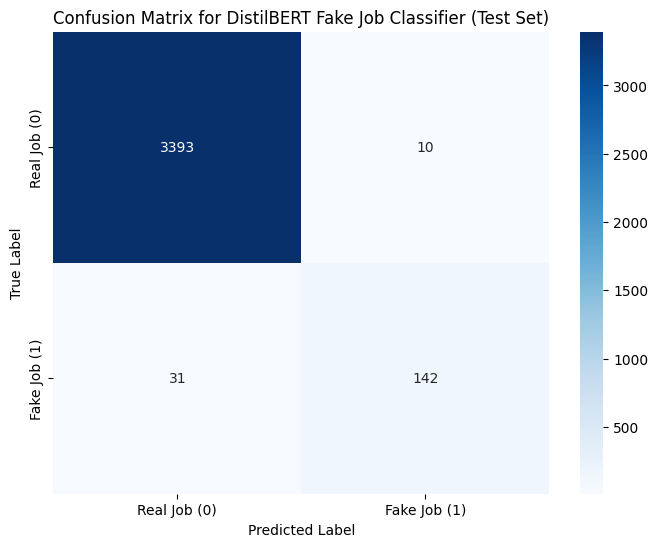


--- Interpretation Guidance ---
-> For 'Fake Job (1)' class:
   - Precision: How many predicted fake jobs were actually fake.
     (High Precision means fewer 'False Positives' - correctly identifies real jobs as real.)
   - Recall: How many actual fake jobs were correctly identified.
     (High Recall means fewer 'False Negatives' - good at catching fake jobs.)
   - F1-Score: A balance between Precision and Recall.

-> Confusion Matrix values:
   - Top-Left (True Negatives): Real jobs correctly predicted as Real.
   - Top-Right (False Positives): Real jobs incorrectly predicted as Fake (Type I Error).
   - Bottom-Left (False Negatives): Fake jobs incorrectly predicted as Real (Type II Error - **THIS IS THE CRITICAL METRIC FOR FAKE JOB DETECTION**).
   - Bottom-Right (True Positives): Fake jobs correctly predicted as Fake.


In [12]:
# Cell for Thorough Model Evaluation

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # Suppress warnings, especially from tokenization

print("\n--- Thorough Evaluation of DistilBERT Model on Test Set ---")

# --- Ensure necessary components are loaded or defined ---
if 'tokenizer' not in locals():
    print("❌ Error: 'tokenizer' not found. Please ensure tokenizer is loaded in a previous cell.")
    exit()
if 'stage1_model' not in locals():
    print("❌ Error: 'stage1_model' not found. Please ensure model is loaded in a previous cell.")
    exit()
if 'MAX_LEN' not in locals():
    MAX_LEN = 128
    print(f"⚠️ 'MAX_LEN' not found, defaulting to {MAX_LEN}.")
if 'DATASET_PATH' not in locals():
    print("❌ Error: 'DATASET_PATH' not found. Please set it to your dataset path.")
    exit()

try:
    # --- 1. Load and Prepare Data ---
    print("1. Loading and preparing data...")
    df = pd.read_csv(DATASET_PATH)
    text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
    for col in text_columns: df[col] = df[col].fillna('')
    df['text_combined'] = df[text_columns].apply(lambda x: ' '.join(x), axis=1)
    
    y_data = df['fraudulent'].values # 0 for Real, 1 for Fake
    X_text_data = df['text_combined'].tolist()
    
    # Split the data into train, validation, and TEST sets
    # This MUST exactly match how you split the data during training!
    X_temp_text, X_test_text, y_temp, y_test = train_test_split(
        X_text_data, y_data, test_size=0.2, random_state=42, stratify=y_data
    )
    print(f"   ✅ Test set re-created with {len(X_test_text)} samples.")
    print(f"   Test set distribution: Real Jobs (0): {np.sum(y_test == 0)}, Fake Jobs (1): {np.sum(y_test == 1)}")

    # --- 2. Tokenize Test Data ---
    print("2. Tokenizing test data...")
    test_inputs = tokenizer(
        X_test_text, 
        return_tensors='tf', 
        truncation=True, 
        padding=True, 
        max_length=MAX_LEN
    )
    print("   ✅ Test data tokenized.")

    # --- 3. Make Predictions on the Test Set ---
    print("3. Making predictions on the test set...")
    tf_test_predictions = stage1_model(test_inputs)
    tf_test_logits = tf_test_predictions.logits
    
    # Convert logits to probabilities (if your model doesn't do it automatically)
    # The model usually outputs logits, so softmax is needed to get probabilities
    tf_test_probs = tf.nn.softmax(tf_test_logits, axis=-1).numpy()
    
    # Get the predicted class (0 or 1) by choosing the class with the highest probability
    y_pred = np.argmax(tf_test_probs, axis=1)
    
    # Also get the probabilities for the 'Fake' class (Class 1) - useful for analysis
    fake_job_probabilities = tf_test_probs[:, 1]
    
    print("   ✅ Predictions made.")

    # --- 4. Evaluate Metrics ---
    print("\n4. Calculating Evaluation Metrics...")
    
    # Overall Accuracy
    overall_accuracy = accuracy_score(y_test, y_pred)
    print(f"   Overall Test Accuracy: {overall_accuracy:.4f}")

    # Classification Report
    # This provides Precision, Recall, F1-score for each class and overall averages
    # 'target_names' helps label the classes clearly
    class_names = ['Real Job (0)', 'Fake Job (1)']
    test_report = classification_report(y_test, y_pred, target_names=class_names)
    print("\n   Classification Report (Test Set):")
    print(test_report)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\n   Confusion Matrix (Test Set):")
    print(conf_matrix) # Raw matrix

    # --- 5. Visualize Confusion Matrix ---
    print("\n5. Visualizing Confusion Matrix...")
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for DistilBERT Fake Job Classifier (Test Set)')
    plt.show()

    # --- Interpretation Guidance ---
    print("\n--- Interpretation Guidance ---")
    print("-> For 'Fake Job (1)' class:")
    print("   - Precision: How many predicted fake jobs were actually fake.")
    print("     (High Precision means fewer 'False Positives' - correctly identifies real jobs as real.)")
    print("   - Recall: How many actual fake jobs were correctly identified.")
    print("     (High Recall means fewer 'False Negatives' - good at catching fake jobs.)")
    print("   - F1-Score: A balance between Precision and Recall.")
    print("\n-> Confusion Matrix values:")
    print("   - Top-Left (True Negatives): Real jobs correctly predicted as Real.")
    print("   - Top-Right (False Positives): Real jobs incorrectly predicted as Fake (Type I Error).")
    print("   - Bottom-Left (False Negatives): Fake jobs incorrectly predicted as Real (Type II Error - **THIS IS THE CRITICAL METRIC FOR FAKE JOB DETECTION**).")
    print("   - Bottom-Right (True Positives): Fake jobs correctly predicted as Fake.")


except FileNotFoundError:
    print(f"❌ ERROR: Dataset not found at '{DATASET_PATH}'. Please check the path.")
except Exception as e:
    print(f"❌ An unexpected error occurred during model evaluation: {e}")